In [2]:
import keras 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten,Embedding
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import pandas as pd
import numpy as np

In [3]:
dtmax=pd.read_excel(r'C:\Users\pc\Desktop\prediction\wondie_dataset\max temprature.xlsx')
dhmin=pd.read_excel(r'C:\Users\pc\Desktop\prediction\wondie_dataset\min temprature.xlsx')
drain=pd.read_excel(r'C:\Users\pc\Desktop\prediction\wondie_dataset\precipitation_C1.xlsx')
dhumidity=pd.read_excel(r'C:\Users\pc\Desktop\prediction\wondie_dataset\relative humidity.xlsx')
dsolar=pd.read_excel(r'C:\Users\pc\Desktop\prediction\wondie_dataset\solar.xlsx')
dwind=pd.read_excel(r'C:\Users\pc\Desktop\prediction\wondie_dataset\wind.xlsx')
print(dtmax.head)

<bound method NDFrame.head of             date      Jimma       Dedo  Assendabo      Shebe  Near Omo_Nada
0     1985-01-01  30.600000  26.400000  30.400000  27.800000      30.540000
1     1985-01-02  30.000000  24.400000  30.400000  27.800000      31.721000
2     1985-01-03  31.800000  26.600000  30.200000  28.000000      31.439000
3     1985-01-04  29.500000  24.400000  30.000000  27.800000      29.198000
4     1985-01-05  29.800000  26.200000  31.000000  28.000000      31.593000
...          ...        ...        ...        ...        ...            ...
12048 2017-12-27  27.612030  22.137042  21.679201  18.853829      28.079689
12049 2017-12-28  28.354938  21.649464  25.456128  20.028508      29.782078
12050 2017-12-29  28.398833  21.994034  23.320960  22.089510      28.313069
12051 2017-12-30  27.629105  22.582008  20.088217  21.360603      26.250481
12052 2017-12-31  28.917160  23.559431  19.606066  20.677545      29.473749

[12053 rows x 6 columns]>


In [5]:
dmax=dtmax.loc[:,["date","Jimma"]]
dmin=dhmin.loc[:,["Jimma"]]
drai=drain.loc[:,["jimma"]]
dhum=dhumidity.loc[:,["jimma"]]
dsol=dsolar.loc[:,["jimma"]]
dwin=dwind.loc[:,["jimma"]]

In [6]:
dataframe=pd.concat([dmax, dmin,dhum,dsol,dwin,drai], axis=1 )

In [5]:
display(dataframe)

,date,Jimma,Jimma,jimma,jimma,jimma,jimma
0,1985-01-01,30.600000,6.500000,64.000000,20.395376,0.400000,0.0
1,1985-01-02,30.000000,6.000000,63.333333,20.973546,0.500000,0.0
2,1985-01-03,31.800000,6.500000,62.333333,21.273610,0.300000,0.0
3,1985-01-04,29.500000,5.000000,60.333333,19.470950,0.900000,0.0
4,1985-01-05,29.800000,4.000000,60.333333,20.334306,0.500000,0.0
...,...,...,...,...,...,...,...
12048,2017-12-27,27.612030,3.811666,80.552480,18.123543,0.412319,0.0
12049,2017-12-28,28.354938,6.041738,83.483454,17.898487,0.381443,0.0
12050,2017-12-29,28.398833,2.912926,80.546092,19.400480,0.370064,0.0
12051,2017-12-30,27.629105,1.959690,82.785047,17.990293,0.395114,0.0


In [7]:
dataframe = dataframe.set_axis(['day','temp_max', 'temp_min', 'humidity','solar','wind_speed','precipitation'], axis=1)

In [7]:
display(dataframe.head(10))

,day,temp_max,temp_min,humidity,solar,wind_speed,precipitation
0,1985-01-01,30.6,6.5,64.000000,20.395376,0.4,0.0
1,1985-01-02,30.0,6.0,63.333333,20.973546,0.5,0.0
2,1985-01-03,31.8,6.5,62.333333,21.273610,0.3,0.0
3,1985-01-04,29.5,5.0,60.333333,19.470950,0.9,0.0
4,1985-01-05,29.8,4.0,60.333333,20.334306,0.5,0.0
5,1985-01-06,29.8,4.0,64.000000,19.654129,0.5,0.0
6,1985-01-07,30.4,4.5,62.666667,21.225383,0.6,0.0
7,1985-01-08,30.0,3.7,61.000000,19.278849,0.4,0.0
8,1985-01-09,30.0,9.0,61.000000,21.278589,0.5,0.1
9,1985-01-10,29.5,12.0,60.666667,18.623404,0.7,0.0


In [8]:
# normalization of the dataset
from sklearn import preprocessing
del dataframe['day']
x = dataframe.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataframe = pd.DataFrame(x_scaled)
print(dataframe)

              0         1         2         3         4    5
0      0.783951  0.381148  0.439689  0.660052  0.066667  0.0
1      0.765432  0.360656  0.429313  0.690924  0.083333  0.0
2      0.820988  0.381148  0.413748  0.706946  0.050000  0.0
3      0.750000  0.319672  0.382620  0.610691  0.150000  0.0
4      0.759259  0.278689  0.382620  0.656791  0.083333  0.0
...         ...       ...       ...       ...       ...  ...
12048  0.691729  0.270970  0.697315  0.538744  0.068720  0.0
12049  0.714659  0.362366  0.742933  0.526727  0.063574  0.0
12050  0.716013  0.234136  0.697215  0.606928  0.061677  0.0
12051  0.692256  0.195069  0.732063  0.531629  0.065852  0.0
12052  0.732011  0.206809  0.538655  0.333827  0.066944  0.0

[12053 rows x 6 columns]


In [10]:
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, 1]
print(X.shape)
print(y.head)

(12053, 5)
<bound method NDFrame.head of 0        0.381148
1        0.360656
2        0.381148
3        0.319672
4        0.278689
           ...   
12048    0.270970
12049    0.362366
12050    0.234136
12051    0.195069
12052    0.206809
Name: 1, Length: 12053, dtype: float64>


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#knearest neighbors regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn. metrics import r2_score
from sklearn.metrics import mean_absolute_error
knn = KNeighborsRegressor(3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
res=r2_score(y_test,y_pred)
print(res)
mae=mean_absolute_error(y_test, y_pred)
print(mae)

0.012026827960469796
0.9938806536603294
0.008885064374416796


In [13]:
list1=[]
for i in range(30):
    list1.append(y_pred[i].tolist())
print(np.vstack(list1))

[[0.20628415]
 [0.58469945]
 [0.66393443]
 [0.50273224]
 [0.6010929 ]
 [0.74590164]
 [0.31557377]
 [0.71174863]
 [0.56967213]
 [0.65437158]
 [0.42213115]
 [0.2773224 ]
 [0.66120219]
 [0.72131148]
 [0.70355191]
 [0.49180328]
 [0.61338798]
 [0.74863388]
 [0.60655738]
 [0.56693989]
 [0.45355191]
 [0.46721311]
 [0.70355191]
 [0.36106644]
 [0.57650273]
 [0.7295082 ]
 [0.62431694]
 [0.24926502]
 [0.61612022]
 [0.66803279]]


In [15]:
list3=[]
for k in range(30):
    print(y_test[k])
#print(y_test)

KeyError: 0

In [62]:
list2=[]
for j in range(30):
    list2.append(j)
print(list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

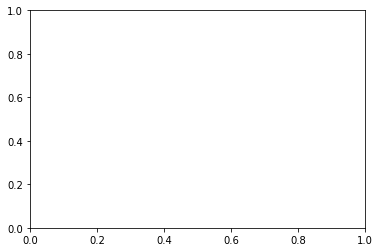

In [67]:
# line 1 points
# plotting the line 1 points 
plt.plot( list2,list, label = "Actual value",color='red')
plt.plot(list2, list1, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points 
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [14]:
#mlp regressor 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn. metrics import r2_score
from sklearn.metrics import mean_absolute_error
reg=MLPRegressor(random_state=1,max_iter=1000)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#mse
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
# r2 score
res=r2_score(y_test,y_pred)
print(res)
# mae
mae=mean_absolute_error(y_test, y_pred)
print(mae)

0.0027912825538688063
0.9996703823649986
0.0017911377931550047


In [31]:
#decision tree regessor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn. metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dtr=DecisionTreeRegressor(random_state = 0,min_samples_leaf=20)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
#mse
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
# r2 score
res=r2_score(y_test,y_pred)
print(res)
# mae
mae=mean_absolute_error(y_test, y_pred)
print(mae)

0.0016287739835104714
0.9998877659889555
0.0004076539977308965


In [15]:
# svm
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
rms = mean_squared_error(y_test, y_pred)
print(rms)
res=r2_score(y_test,y_pred)
print(res)
mae=mean_absolute_error(y_test, y_pred)
print(mae)

0.0007347724523790679
0.9689146542406029
0.021276849314824705


In [24]:
#linearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rms = mean_squared_error(y_test, y_pred)
print(rms)
res=r2_score(y_test,y_pred)
print(res)
mae=mean_absolute_error(y_test, y_pred)
print(mae)

1.5938213586043658e-32
1.0
9.423915862152229e-17


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
attribute=X.to_numpy()
label=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(attribute, label, test_size=0.2, random_state=0)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(9642, 5, 1)
(9642,)


In [28]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (5,1)))
regressor.add(Dense(128))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 10)
y_pre=regressor.predict(X_test)
#y_pre=y_pre.flatten()
print(len(y_pre))
print(len(y_test))

Epoch 1/10
302/302 [==============================] - 6s 7ms/step - loss: 0.0919
Epoch 2/10
302/302 [==============================] - 2s 7ms/step - loss: 0.0069
Epoch 3/10
302/302 [==============================] - 2s 7ms/step - loss: 0.0021
Epoch 4/10
 18/302 [>.............................] - ETA: 1s - loss: 0.0013

KeyboardInterrupt: 

In [ ]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (5,1)))
regressor.add(Dense(128))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
regressor.fit(X_train, y_train, epochs = 10)
y_pre=regressor.predict(X_test)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (5,1)))
regressor.add(Dense(128))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_percentage_error')
regressor.fit(X_train, y_train, epochs = 10)
y_pre=regressor.predict(X_test)

In [ ]:
scores = regressor.evaluate(X_test, y_test, verbose=0)
print(scores)

In [24]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (5,1)))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
regressor.fit(X_train, y_train, epochs = 5)
y_pre=regressor.predict(X_test,verbose=0)
print(y_pre)

Epoch 1/5
302/302 [==============================] - 4s 6ms/step - loss: 0.1449
Epoch 2/5
302/302 [==============================] - 2s 7ms/step - loss: 0.0323
Epoch 3/5
302/302 [==============================] - 2s 8ms/step - loss: 0.0271
Epoch 4/5
302/302 [==============================] - 2s 8ms/step - loss: 0.0215
Epoch 5/5
302/302 [==============================] - 2s 6ms/step - loss: 0.0184
[[0.20492995]
 [0.56177384]
 [0.6619595 ]
 ...
 [0.7245794 ]
 [0.29065785]
 [0.6811712 ]]


In [25]:
list1=[]
for i in range(30):
    list1.append(y_pre[i].tolist())
print(np.vstack(list1))

[[0.20492995]
 [0.56177384]
 [0.66195953]
 [0.5782305 ]
 [0.61653167]
 [0.76141459]
 [0.30341762]
 [0.71183652]
 [0.57523572]
 [0.660487  ]
 [0.40350083]
 [0.31841519]
 [0.64545339]
 [0.72830641]
 [0.70405561]
 [0.49325475]
 [0.62818664]
 [0.77125728]
 [0.59823442]
 [0.56530958]
 [0.4928562 ]
 [0.44779187]
 [0.67530447]
 [0.36128122]
 [0.56843776]
 [0.7212255 ]
 [0.64379567]
 [0.23102115]
 [0.62244505]
 [0.64426881]]


In [26]:
list=[]
for i in range(30):
    list.append(y_test[i])
print(list)

[0.20491803278688525, 0.5860655737704917, 0.680327868852459, 0.48360655737704916, 0.6065573770491803, 0.7377049180327868, 0.29918032786885246, 0.7295081967213114, 0.5655737704918032, 0.6557377049180327, 0.4221311475409836, 0.29918032786885246, 0.6680327868852459, 0.7213114754098361, 0.7049180327868853, 0.48360655737704916, 0.6229508196721312, 0.7704918032786885, 0.5983606557377049, 0.5614754098360656, 0.4508196721311475, 0.46311475409836067, 0.6967213114754098, 0.3770491803278689, 0.5737704918032787, 0.7295081967213114, 0.6311475409836065, 0.2457116704235462, 0.6065573770491803, 0.6475409836065573]


In [27]:
list2=[]
for j in range(30):
    list2.append(j)
print(list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


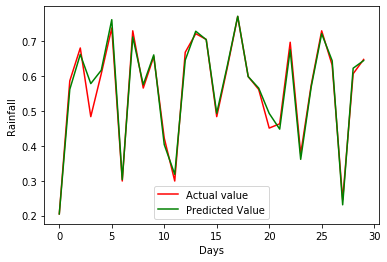

In [28]:
import matplotlib.pyplot as plt
# line 1 points
# plotting the line 1 points 
plt.plot( list2,list, label = "Actual value",color='red')
plt.plot(list2, list1, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points 
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

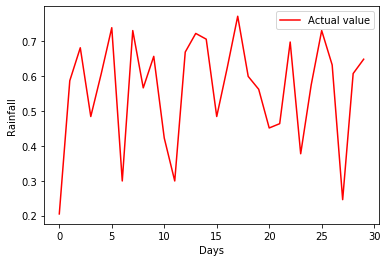

In [47]:
import matplotlib.pyplot as plt
# line 1 points
# plotting the line 1 points 
#plt.plot(list2, list1, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points 
plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [31]:
res=r2_score(y_test,y_pre)
print(res)

0.9999860349188433


In [32]:
rms = np.sqrt(mean_squared_error(y_test, y_pre))
print(rms)

0.0005745400576071495


In [33]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pre)
print(mae)

0.0003978093458854846
